In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=159db94ba16dc28b483892fea699a89f


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | hay river
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | carros
Processing Record 14 of Set 1 | danville
Processing Record 15 of Set 1 | tautira
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | jalu
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of

Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | ewa beach
Processing Record 42 of Set 4 | leh
Processing Record 43 of Set 4 | durban
Processing Record 44 of Set 4 | kamaishi
Processing Record 45 of Set 4 | dan khun thot
Processing Record 46 of Set 4 | silver city
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | carutapera
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | tucuman
Processing Record 1 of Set 5 | falealupo
City not found. Skipping...
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | rapid valley
Processing Record 4 of Set 5 | samalaeulu
City not found. Skipping...
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | kaka
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | nguiu
City not found. Skipping...
Processing Record 10 of Set 5 | fort nelson
Processing Record 11 of Set 5 | port-gentil
Pro

Processing Record 27 of Set 8 | seoul
Processing Record 28 of Set 8 | briancon
Processing Record 29 of Set 8 | del rio
Processing Record 30 of Set 8 | felanitx
Processing Record 31 of Set 8 | mithimna
City not found. Skipping...
Processing Record 32 of Set 8 | cozumel
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | bang saphan
Processing Record 36 of Set 8 | yalta
Processing Record 37 of Set 8 | svetlaya
Processing Record 38 of Set 8 | cabra
Processing Record 39 of Set 8 | vao
Processing Record 40 of Set 8 | port keats
Processing Record 41 of Set 8 | batemans bay
Processing Record 42 of Set 8 | lindi
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | unye
City not found. Skipping...
Processing Record 45 of Set 8 | kembe
Processing Record 46 of Set 8 | ochamchira
Processing Record 47 of Set 8 | gazanjyk
Processing Record 48 of Set 8 | itaobim
Processing Record 49 of Set 8 | tazovskiy
Proce

Processing Record 12 of Set 12 | saint-georges
Processing Record 13 of Set 12 | saint anthony
Processing Record 14 of Set 12 | mabaruma
Processing Record 15 of Set 12 | kimbe
Processing Record 16 of Set 12 | skjervoy
Processing Record 17 of Set 12 | zambrow
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | kiama
Processing Record 20 of Set 12 | silopi
Processing Record 21 of Set 12 | agadez
Processing Record 22 of Set 12 | saleaula
City not found. Skipping...
Processing Record 23 of Set 12 | khuzhir
Processing Record 24 of Set 12 | kruisfontein
Processing Record 25 of Set 12 | dukat
Processing Record 26 of Set 12 | ouadda
Processing Record 27 of Set 12 | morro bay
Processing Record 28 of Set 12 | jacareacanga
Processing Record 29 of Set 12 | krasnyye baki
Processing Record 30 of Set 12 | miandrivazo
Processing Record 31 of Set 12 | north miami beach
Processing Record 32 of Set 12 | oranjemund
Processing Record 33 of Set 12 | aberdeen
Processing Record 34 of 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,48.31,46,20,34.52,CL,2022-02-13 22:24:14
1,Mataura,-46.1927,168.8643,60.48,62,26,2.35,NZ,2022-02-13 22:28:24
2,Clyde River,70.4692,-68.5914,-18.17,76,100,21.85,CA,2022-02-13 22:27:28
3,New Norfolk,-42.7826,147.0587,62.65,67,94,2.37,AU,2022-02-13 22:28:25
4,Praia Da Vitoria,38.7333,-27.0667,57.45,77,75,6.35,PT,2022-02-13 22:28:25
5,Vila Velha,-20.3297,-40.2925,75.15,95,100,4.61,BR,2022-02-13 22:25:02
6,Rikitea,-23.1203,-134.9692,78.51,71,74,12.59,PF,2022-02-13 22:28:26
7,Bluff,-46.6000,168.3333,60.80,71,18,2.98,NZ,2022-02-13 22:28:27
8,Touros,-5.1989,-35.4608,83.30,76,8,12.95,BR,2022-02-13 22:28:27
9,Hay River,60.8156,-115.7999,-7.62,71,75,2.30,CA,2022-02-13 22:28:28


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-02-13 22:24:14,-53.1500,-70.9167,48.31,46,20,34.52
1,Mataura,NZ,2022-02-13 22:28:24,-46.1927,168.8643,60.48,62,26,2.35
2,Clyde River,CA,2022-02-13 22:27:28,70.4692,-68.5914,-18.17,76,100,21.85
3,New Norfolk,AU,2022-02-13 22:28:25,-42.7826,147.0587,62.65,67,94,2.37
4,Praia Da Vitoria,PT,2022-02-13 22:28:25,38.7333,-27.0667,57.45,77,75,6.35


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

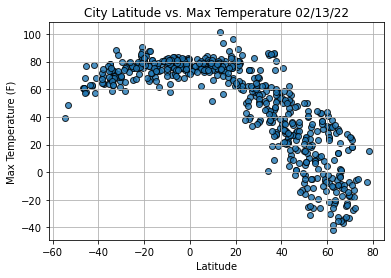

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

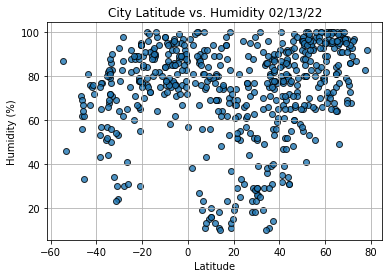

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

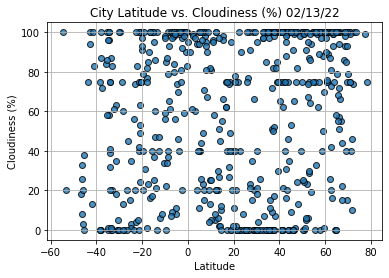

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

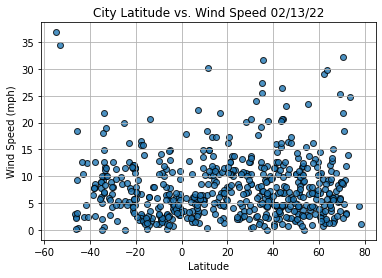

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Tautira
Country                        PF
Date          2022-02-13 22:28:29
Lat                      -17.7333
Lng                       -149.15
Max Temp                    87.82
Humidity                       76
Cloudiness                     82
Wind Speed                  16.55
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
575     True
576     True
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Clyde River,CA,2022-02-13 22:27:28,70.4692,-68.5914,-18.17,76,100,21.85
4,Praia Da Vitoria,PT,2022-02-13 22:28:25,38.7333,-27.0667,57.45,77,75,6.35
9,Hay River,CA,2022-02-13 22:28:28,60.8156,-115.7999,-7.62,71,75,2.30
11,Carros,FR,2022-02-13 22:28:29,43.7894,7.1840,43.61,80,75,6.91
12,Danville,US,2022-02-13 22:28:07,36.5860,-79.3950,39.88,88,100,4.61


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

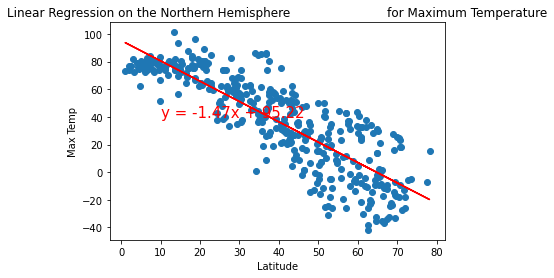

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

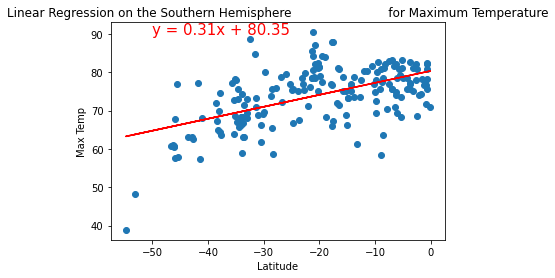

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

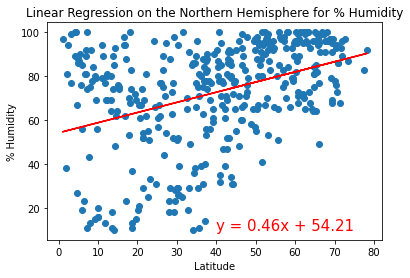

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

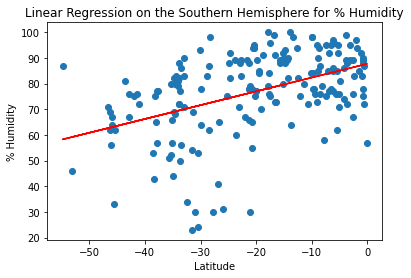

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

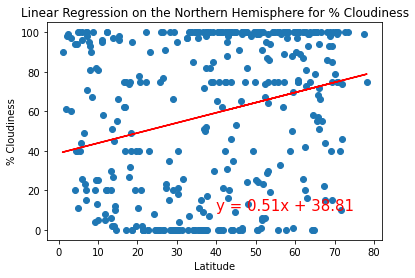

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

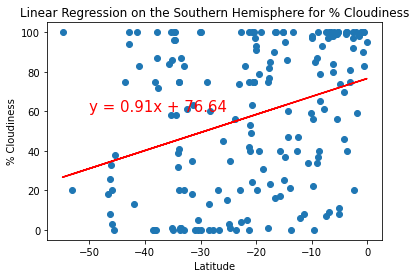

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

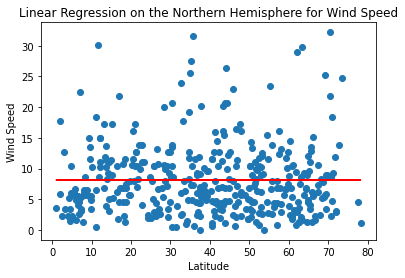

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))


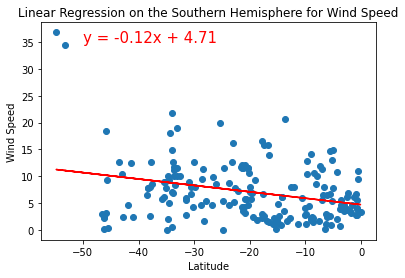

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))